# Level 1

## Task 1 : Data Exploration and Preprocessing

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
import matplotlib.lines as lines
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
import seaborn as sn
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Dataset.csv")

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:

def apply_chart_styling(ax,fig,title,subtitle,insight_text):
    fig.patch.set_facecolor('#f7f7f7') # Background colors
    ax.set_facecolor('#f7f7f7')

    fig.text(0.3,1.05,title,fontsize=30,fontweight='bold',fontfamily="Franklin Gothic Heavy")
    fig.text(0.25,0.99,subtitle,fontsize=25,fontweight='bold',fontfamily='Segoe UI')

    fig.text(1.1,1.01,'Insight',fontsize=24,fontweight='bold',fontfamily="Segoe UI")
    fig.text(1.1,0.50,insight_text,fontsize=22,fontweight='light',fontfamily='Arial Rounded MT Bold')

    ax.grid(axis='y',linestyle='-',alpha=0.4)
    ax.set_axisbelow('True')

    for spine in ['top','right','left']:
        ax.spines[spine].set_visible(False)

    ax.tick_params(axis = 'both',which = 'major', labelsize = 16)

    l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
    fig.lines.extend([l1])
palette = ["#FF6B6B", "#4ECDC4", "#FFD93D", "#6A5ACD", "#FF8C42", "#00C9A7"]


In [6]:
# No. of rows and No. of columns
print("Total Rows :",df.shape[0])
print("Total Columns :",df.shape[1])

Total Rows : 9551
Total Columns : 21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#### Handling Null Values


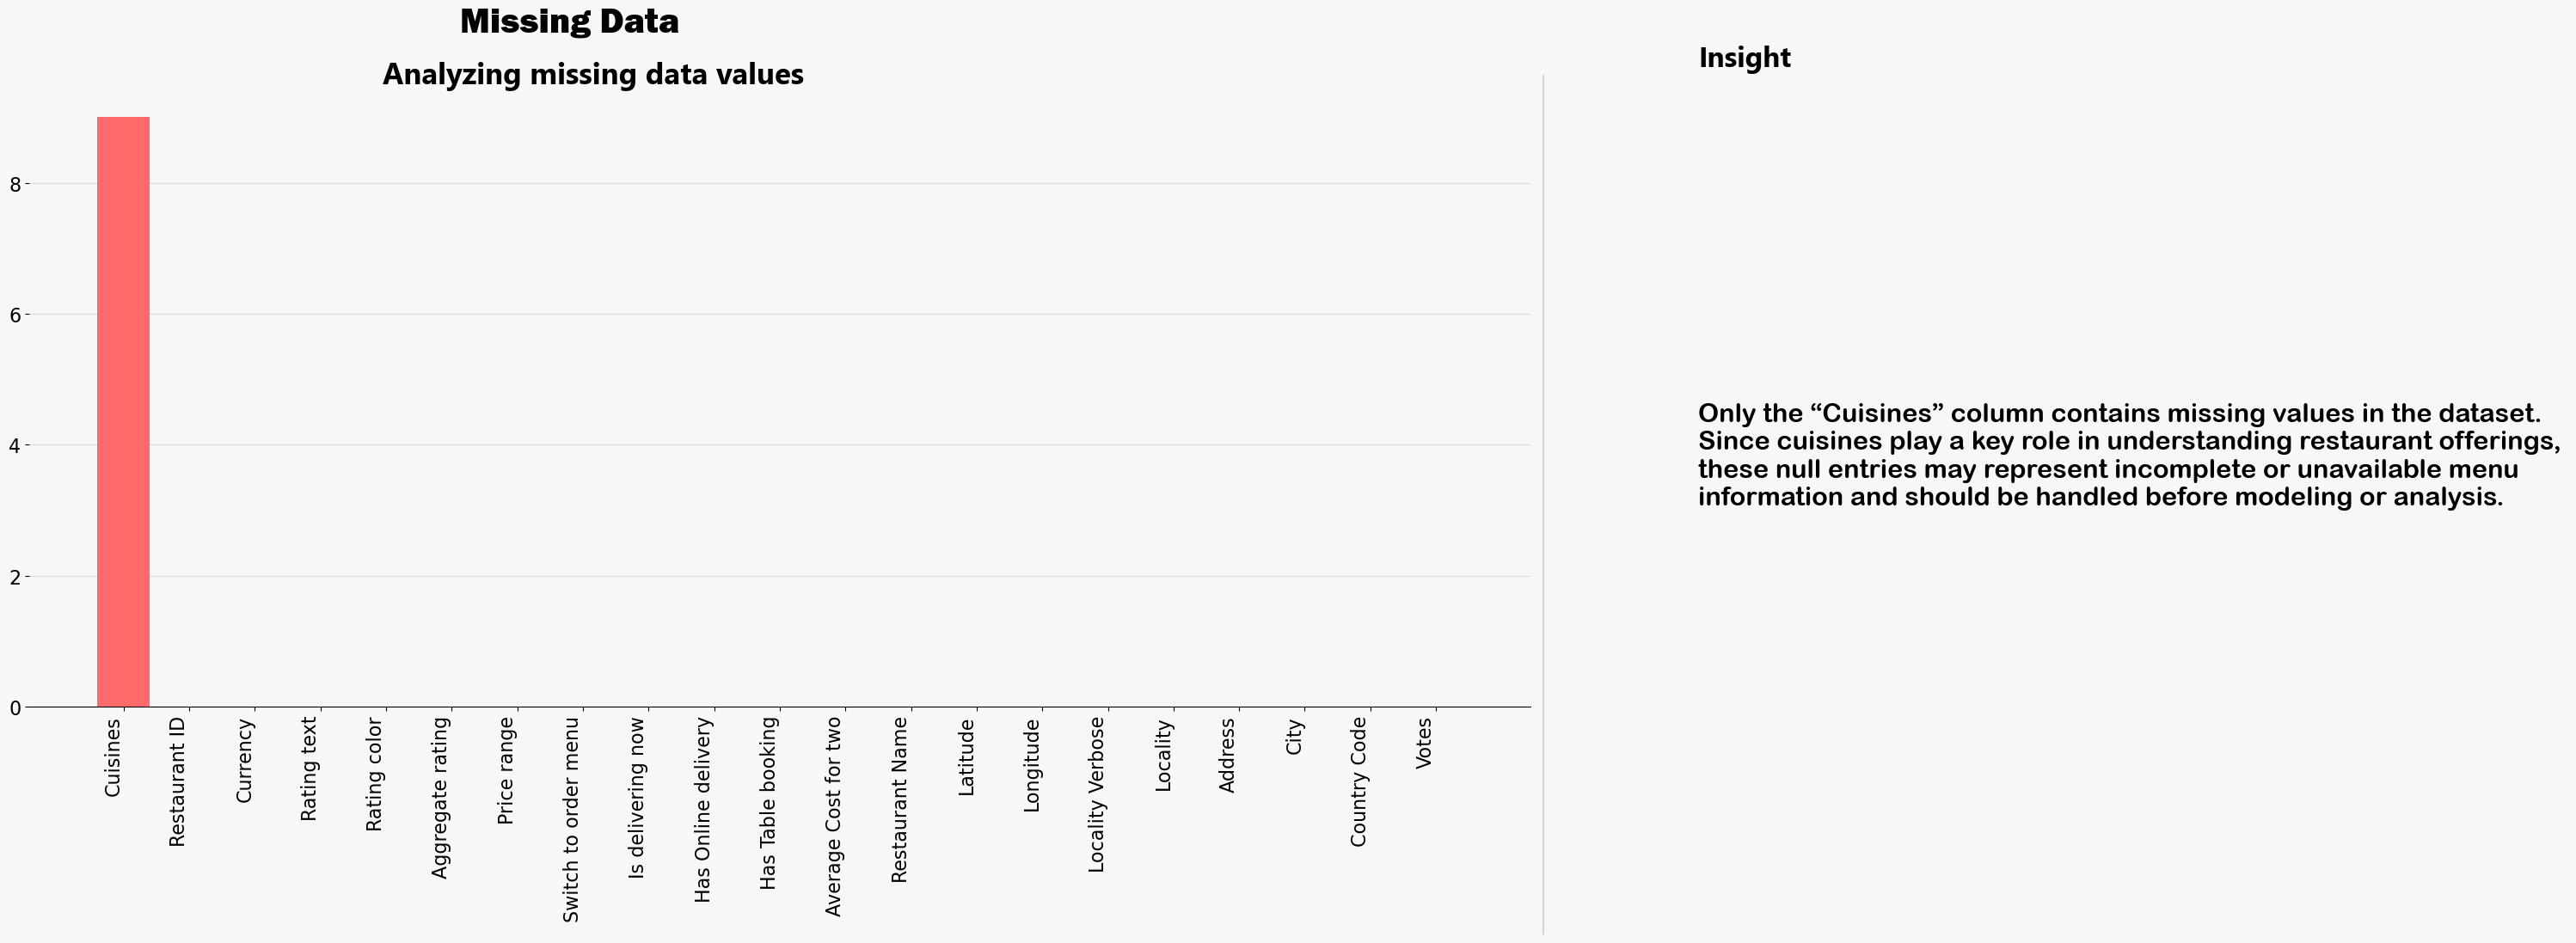

In [8]:
missing_data = df.isnull().sum().sort_values(ascending=False)

fig,ax = plt.subplots(1,1,figsize=(18,10))

bars = ax.bar(missing_data.index,missing_data.values,color = palette)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, ha = 'right')

apply_chart_styling(ax = ax, fig = fig, title = 'Missing Data' , subtitle = 'Analyzing missing data values', insight_text = '''Only the “Cuisines” column contains missing values in the dataset. 
Since cuisines play a key role in understanding restaurant offerings, 
these null entries may represent incomplete or unavailable menu 
information and should be handled before modeling or analysis.''')

plt.tight_layout()
plt.show()

In [9]:
# Handling Null values
df['Cuisines']=df['Cuisines'].fillna('Unknown')
df['Cuisines'].isnull().sum()

0

### Distribution of the target variable


In [10]:
# Checking Null values
df['Aggregate rating'].isnull().sum()

0

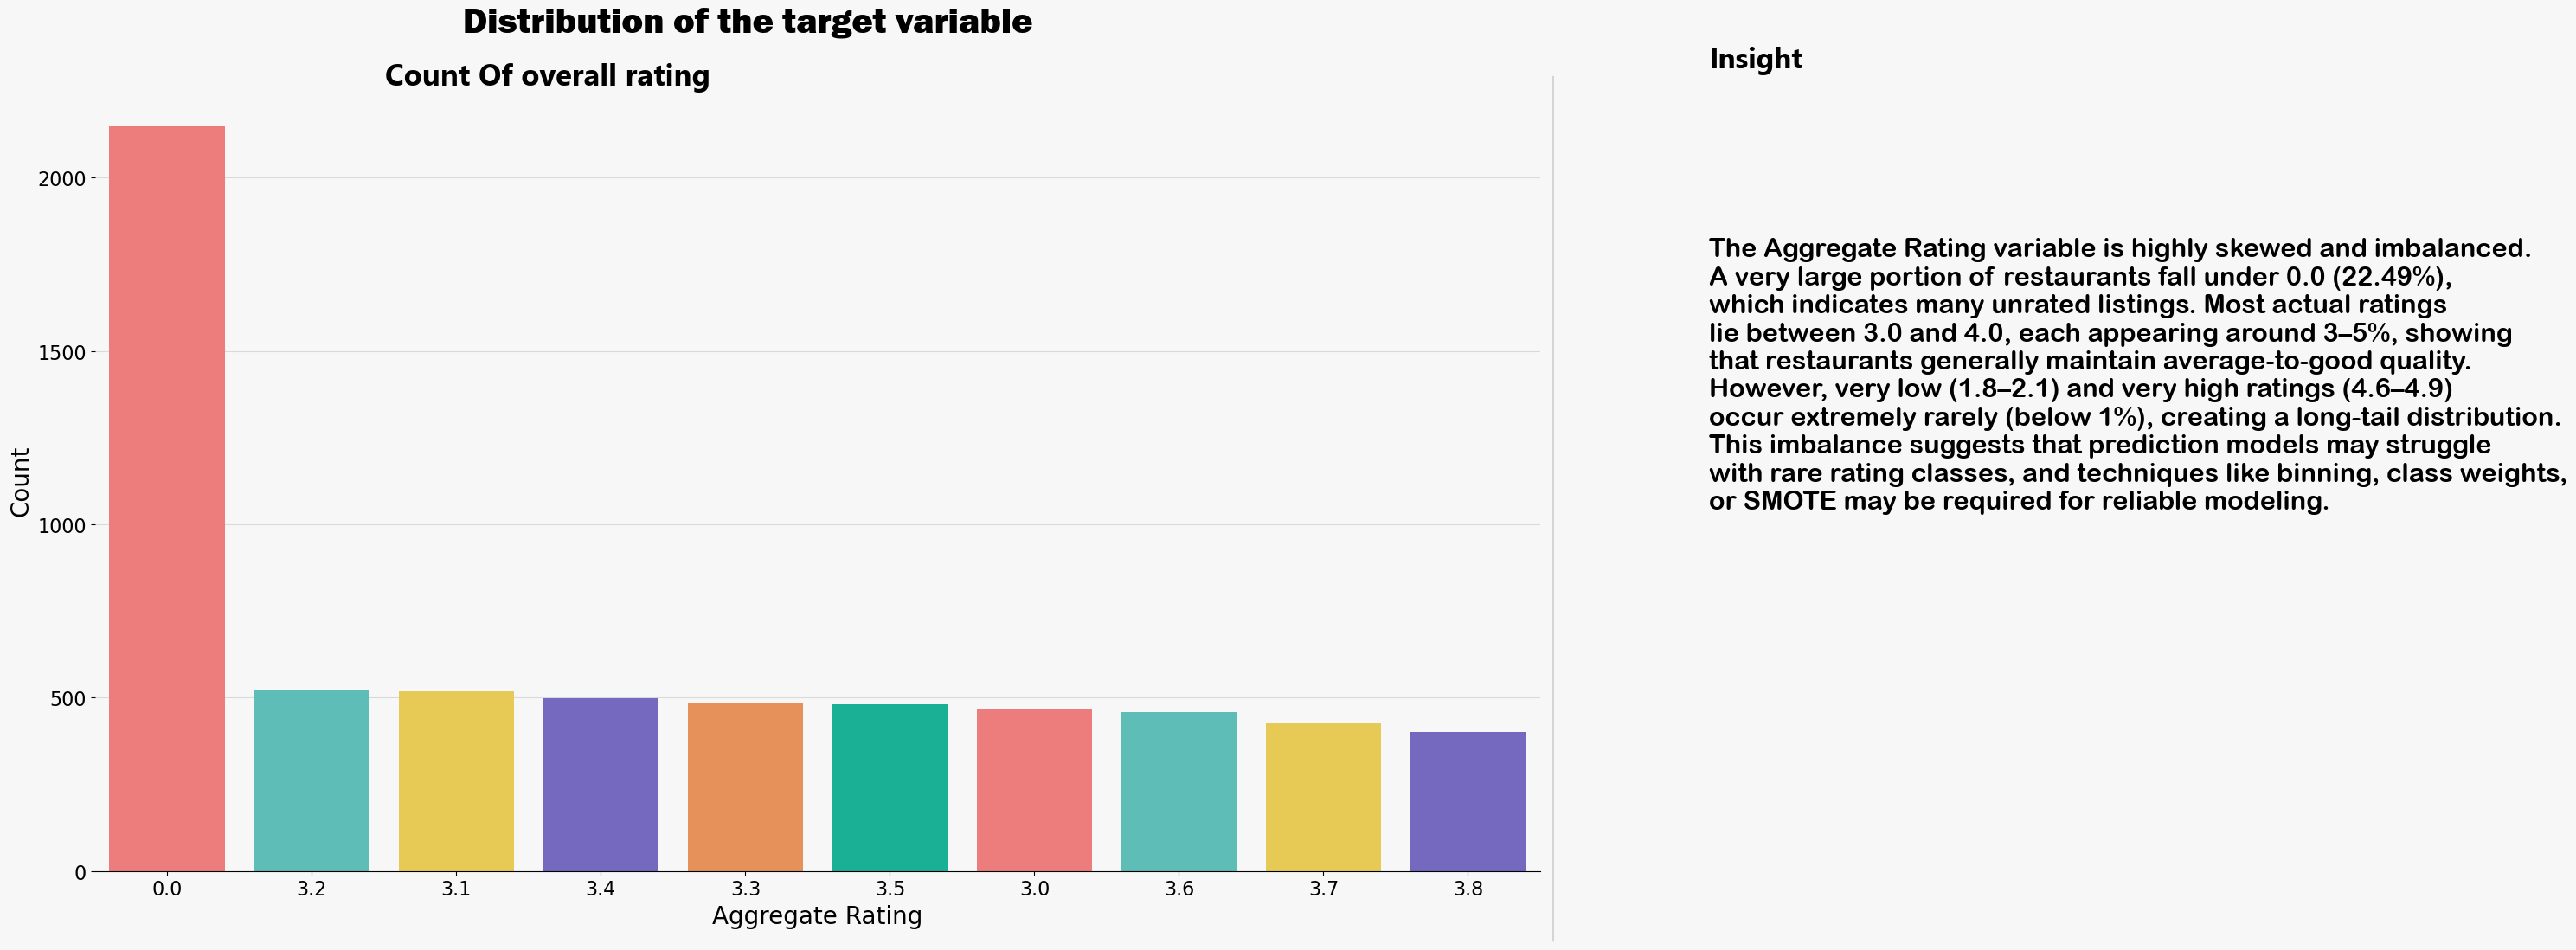

In [15]:
import seaborn as sns
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plot count plot
sns.countplot(x="Aggregate rating",order=df["Aggregate rating"].value_counts().nlargest(10).index, data=df,palette=palette)
plt.xlabel("Aggregate Rating",fontsize=20)
plt.ylabel("Count",fontsize=20)
# apply chart styling
apply_chart_styling(ax=ax,fig=fig,title="Distribution of the target variable",subtitle='Count Of overall rating',insight_text='''The Aggregate Rating variable is highly skewed and imbalanced. 
A very large portion of restaurants fall under 0.0 (22.49%), 
which indicates many unrated listings. Most actual ratings 
lie between 3.0 and 4.0, each appearing around 3–5%, showing
that restaurants generally maintain average-to-good quality. 
However, very low (1.8–2.1) and very high ratings (4.6–4.9) 
occur extremely rarely (below 1%), creating a long-tail distribution.
This imbalance suggests that prediction models may struggle
with rare rating classes, and techniques like binning, class weights,
or SMOTE may be required for reliable modeling.''')
plt.tight_layout()
plt.show()

## Task 2 : Descriptive Analysis

1. Calculate basic statistical measures (mean,
median, standard deviation, etc.) for numerical
columns.

In [11]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


2. Explore the distribution of categorical
variables like "Country Code,City and Cuisines.

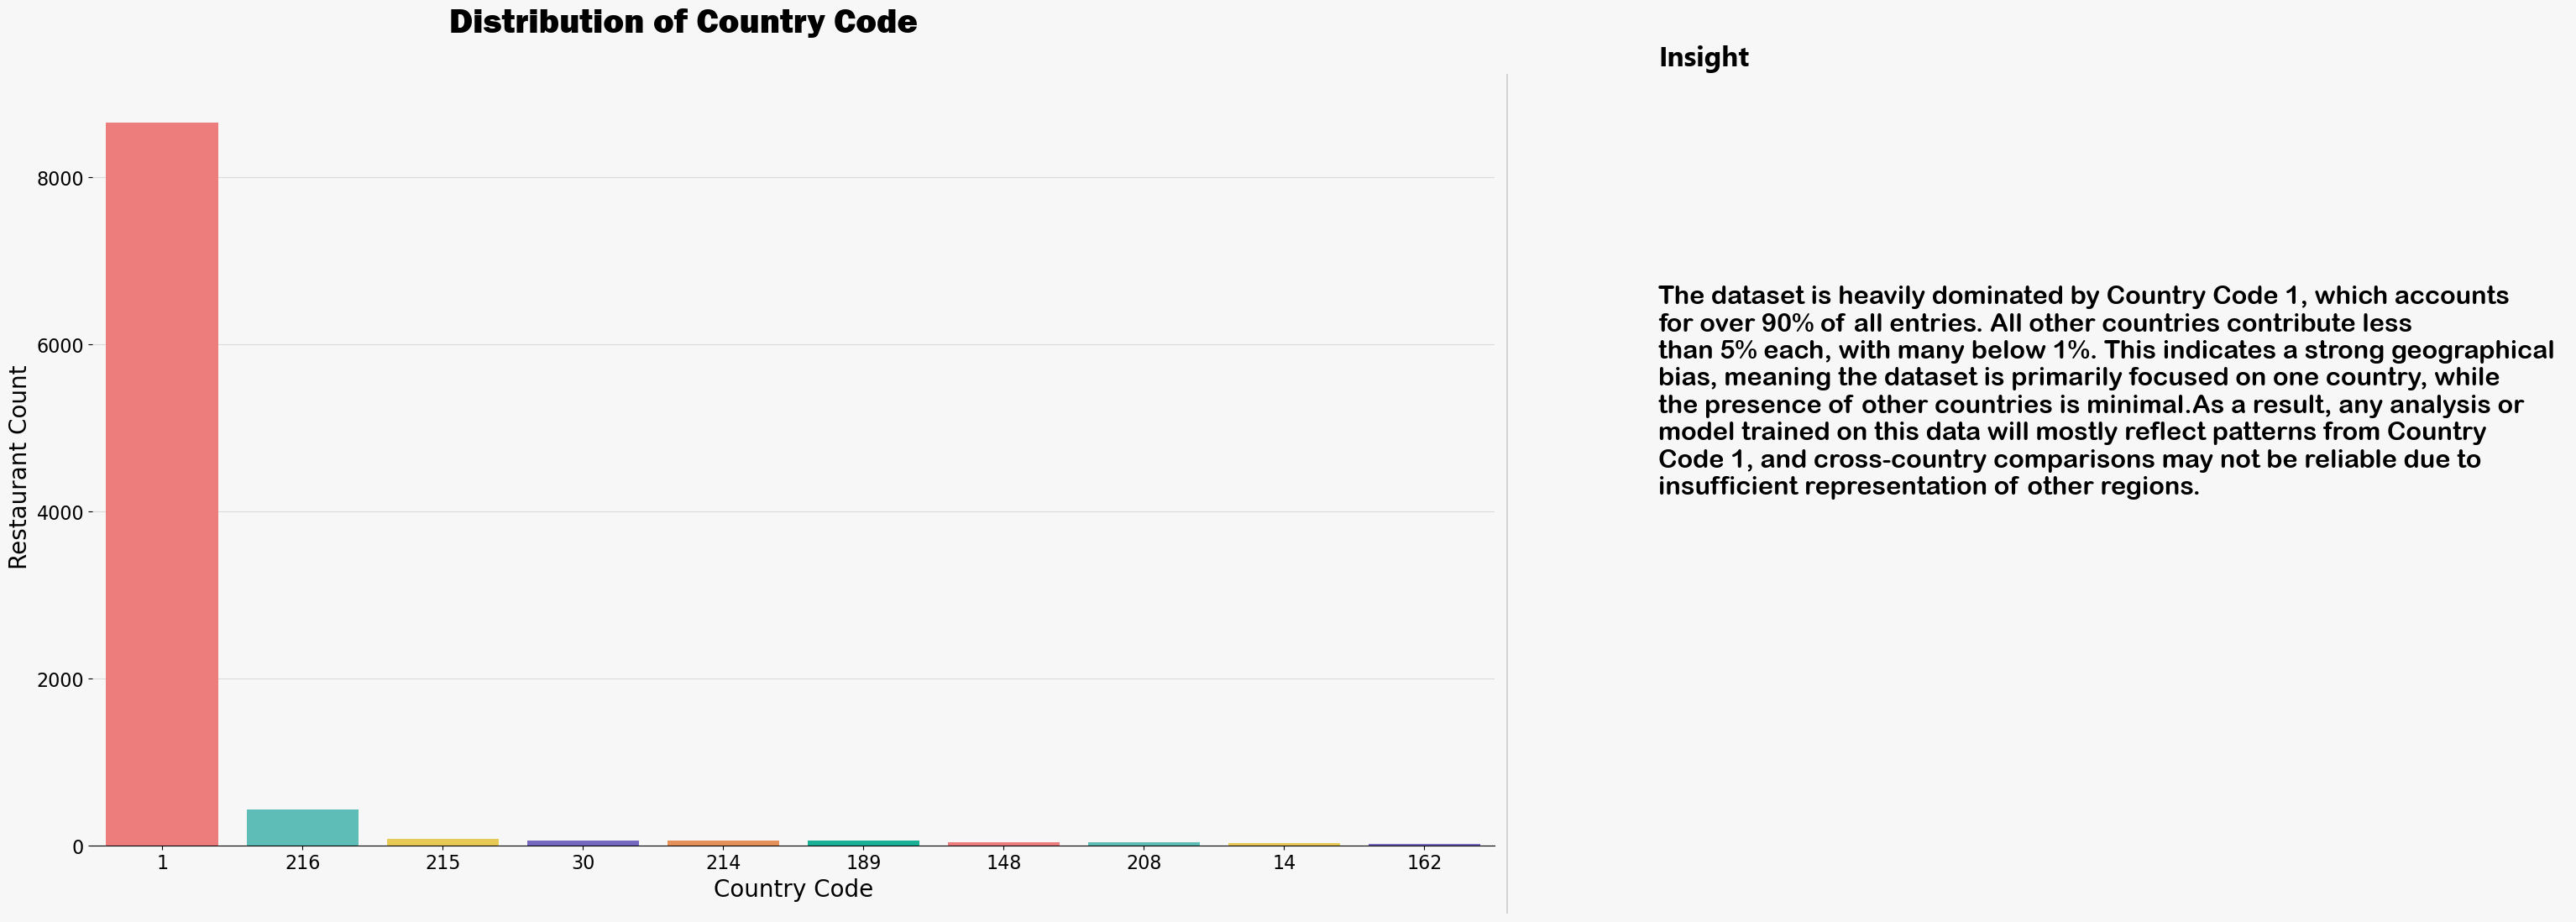

In [16]:
# distribution of Country Code
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plot count plot
sns.countplot(x="Country Code",order=df["Country Code"].value_counts().nlargest(10).index, data=df,palette=palette)
plt.xlabel("Country Code",fontsize=20)
plt.ylabel("Restaurant Count",fontsize=20)
# apply chart styling
apply_chart_styling(ax=ax,fig=fig,title="Distribution of Country Code",subtitle='',insight_text='''The dataset is heavily dominated by Country Code 1, which accounts 
for over 90% of all entries. All other countries contribute less
than 5% each, with many below 1%. This indicates a strong geographical  
bias, meaning the dataset is primarily focused on one country, while 
the presence of other countries is minimal.As a result, any analysis or
model trained on this data will mostly reflect patterns from Country 
Code 1, and cross-country comparisons may not be reliable due to
insufficient representation of other regions.''')
plt.tight_layout()
plt.show()

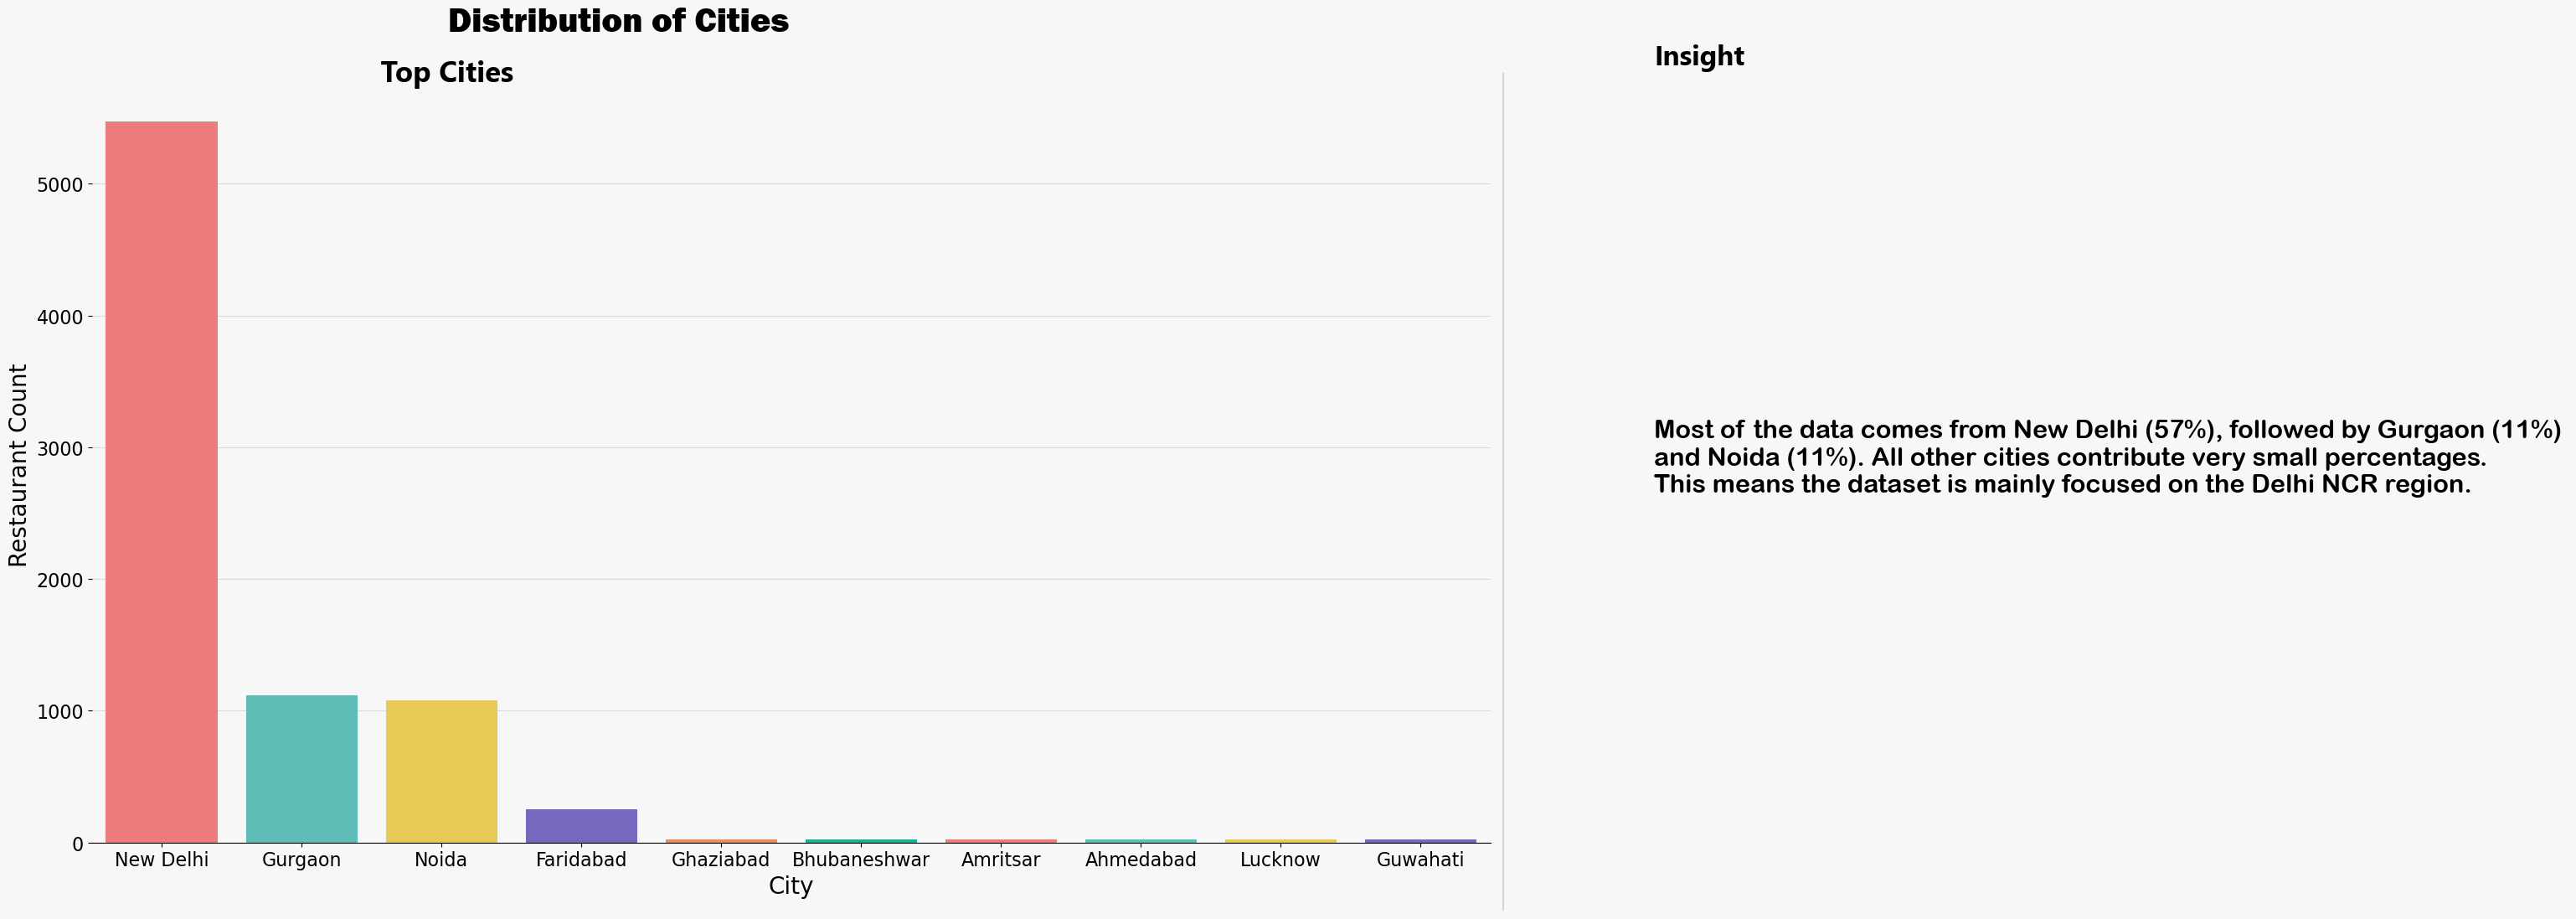

In [17]:
# Distribution of City
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plot count plot
sns.countplot(x="City",order=df["City"].value_counts().nlargest(10).index, data=df,palette=palette)
plt.xlabel("City",fontsize=20)
plt.ylabel("Restaurant Count",fontsize=20)
# apply styling
apply_chart_styling(ax=ax,fig=fig,title="Distribution of Cities",subtitle=' Top Cities ',insight_text='''Most of the data comes from New Delhi (57%), followed by Gurgaon (11%) 
and Noida (11%). All other cities contribute very small percentages.
This means the dataset is mainly focused on the Delhi NCR region.''')
plt.tight_layout()
plt.show()

In [14]:
# Distribution of Cuisines
df['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

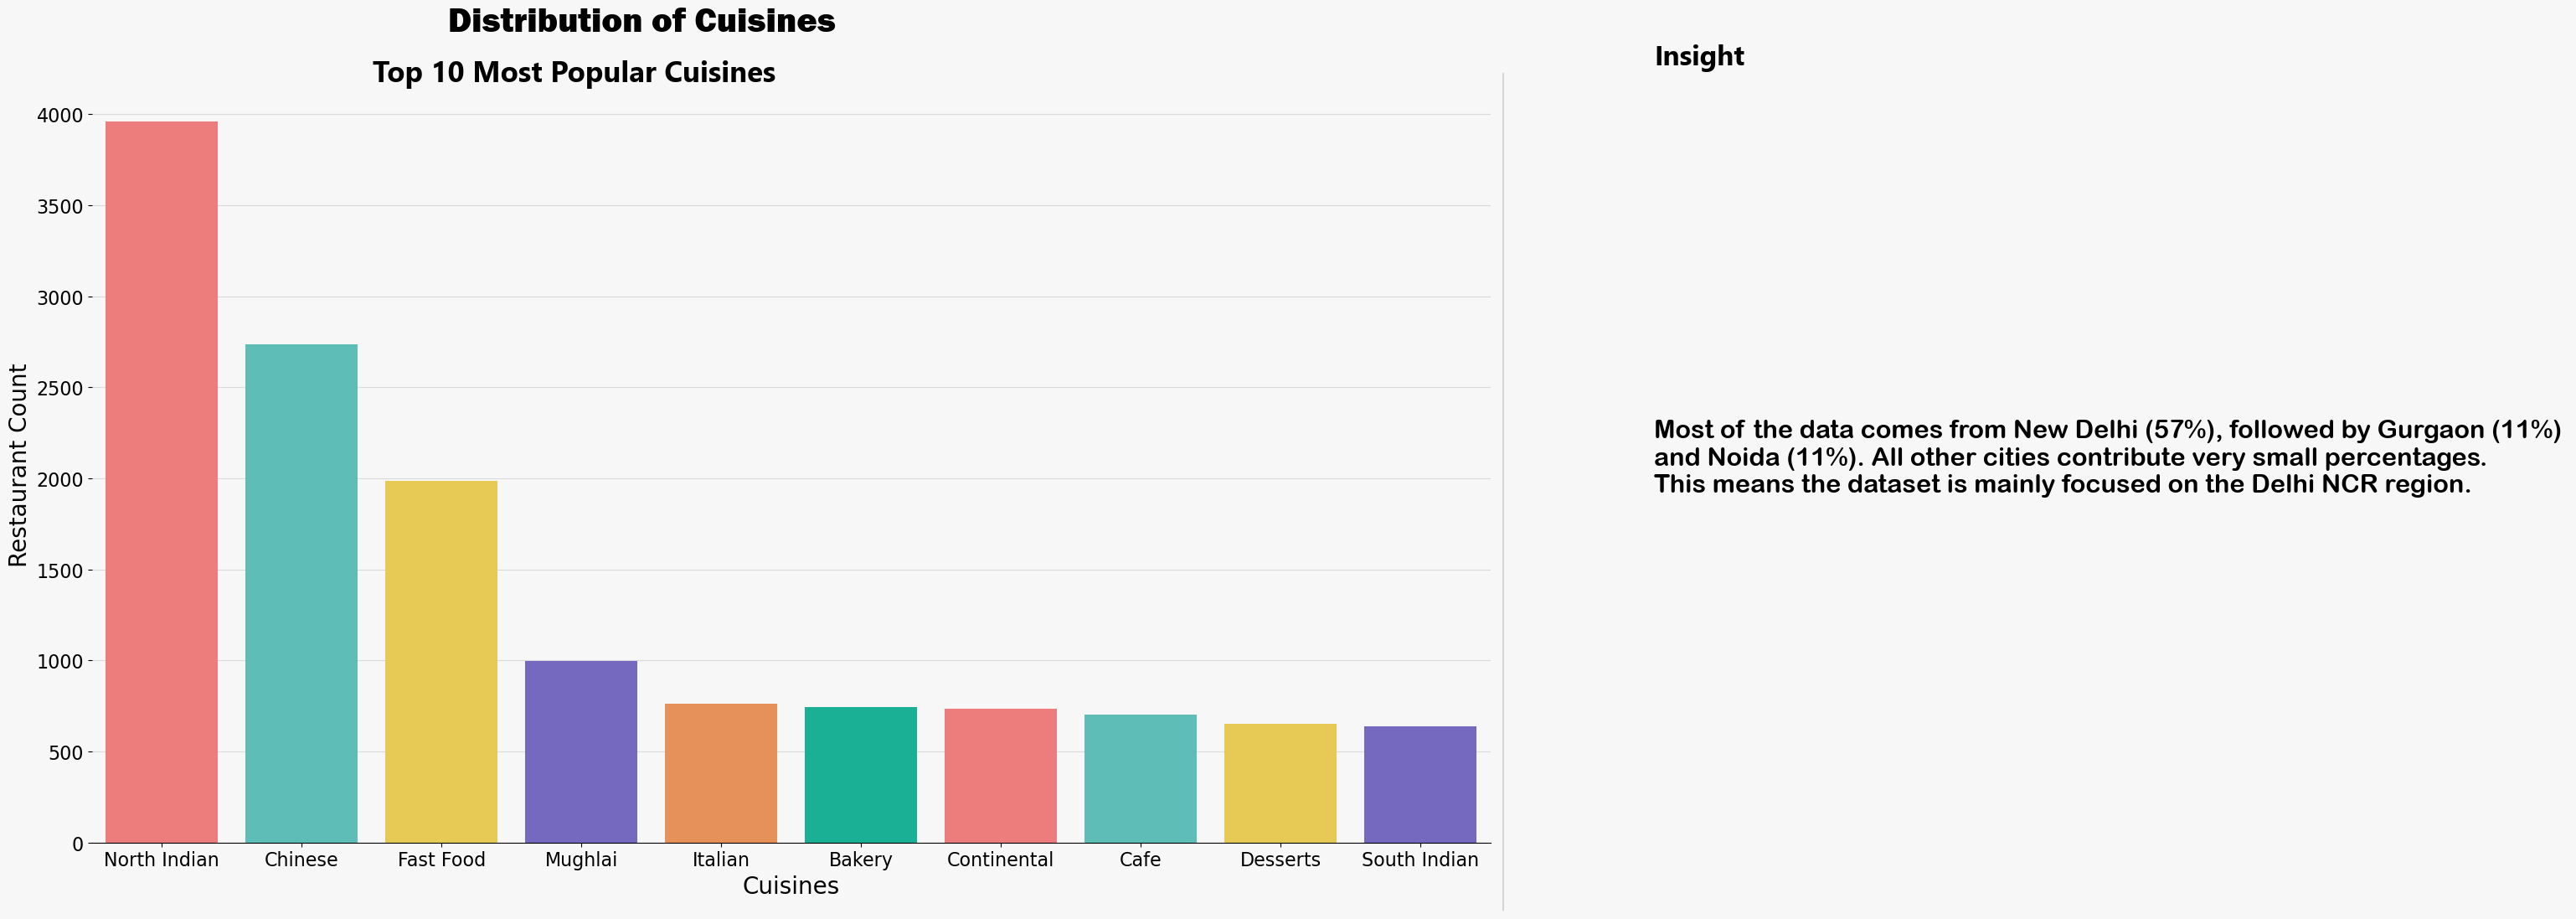

In [18]:
cuisines_series=df['Cuisines'].str.split(',').explode().str.strip()
cuisine_counts = cuisines_series.value_counts().reset_index()
cuisine_counts.columns = ['Cuisine', 'Count']

fig,ax=plt.subplots(1,1,figsize=(18,10))
# plot count plot
sns.barplot(
    x="Cuisine",
    y="Count",
    data=cuisine_counts.head(10),   # Top 10
    palette=palette
)
plt.xlabel("Cuisines",fontsize=20)
plt.ylabel("Restaurant Count",fontsize=20)

# apply styling
apply_chart_styling(ax=ax,fig=fig,title="Distribution of Cuisines",subtitle='Top 10 Most Popular Cuisines',insight_text='''Most of the data comes from New Delhi (57%), followed by Gurgaon (11%) 
and Noida (11%). All other cities contribute very small percentages.
This means the dataset is mainly focused on the Delhi NCR region.''')
plt.tight_layout()
plt.show()

## Task 3 : Geospatial Analysis

#### 1. Visualize the locations of restaurants on a map using latitude and longitude information.

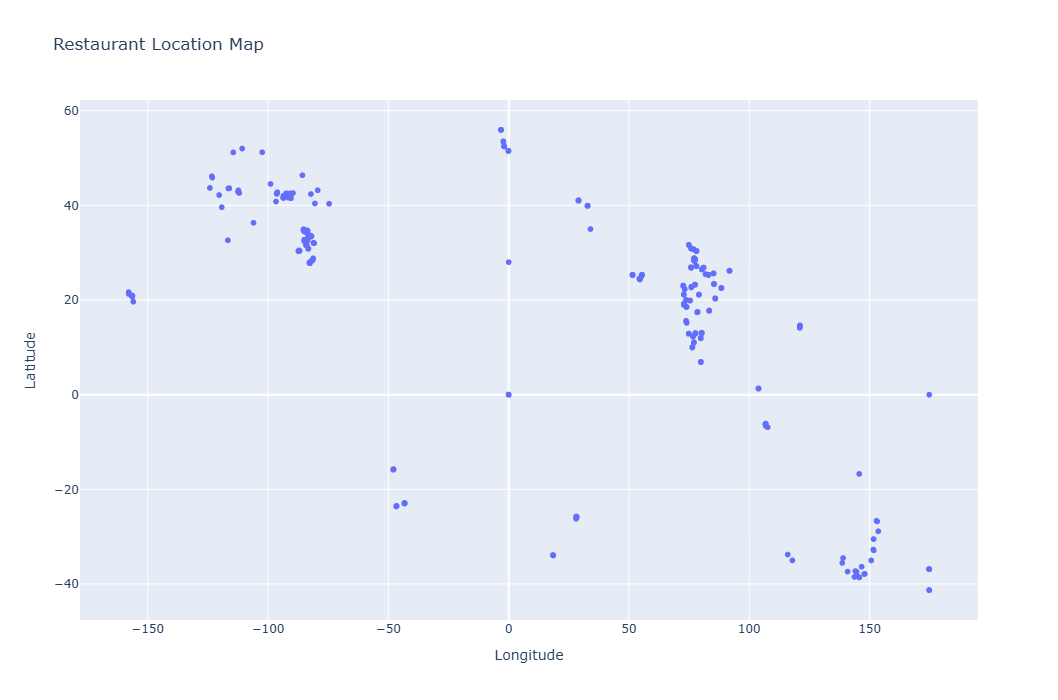

In [58]:
fig = px.scatter(
    df,
    x="Longitude",
    y="Latitude",
    hover_name="Restaurant Name", 
    hover_data=["City", "Aggregate rating"],
    title=" Restaurant Location Map",
    width=900,
    height=700
)
fig.show()


#### 2. Analyze the distribution of restaurants across different cities or countries.

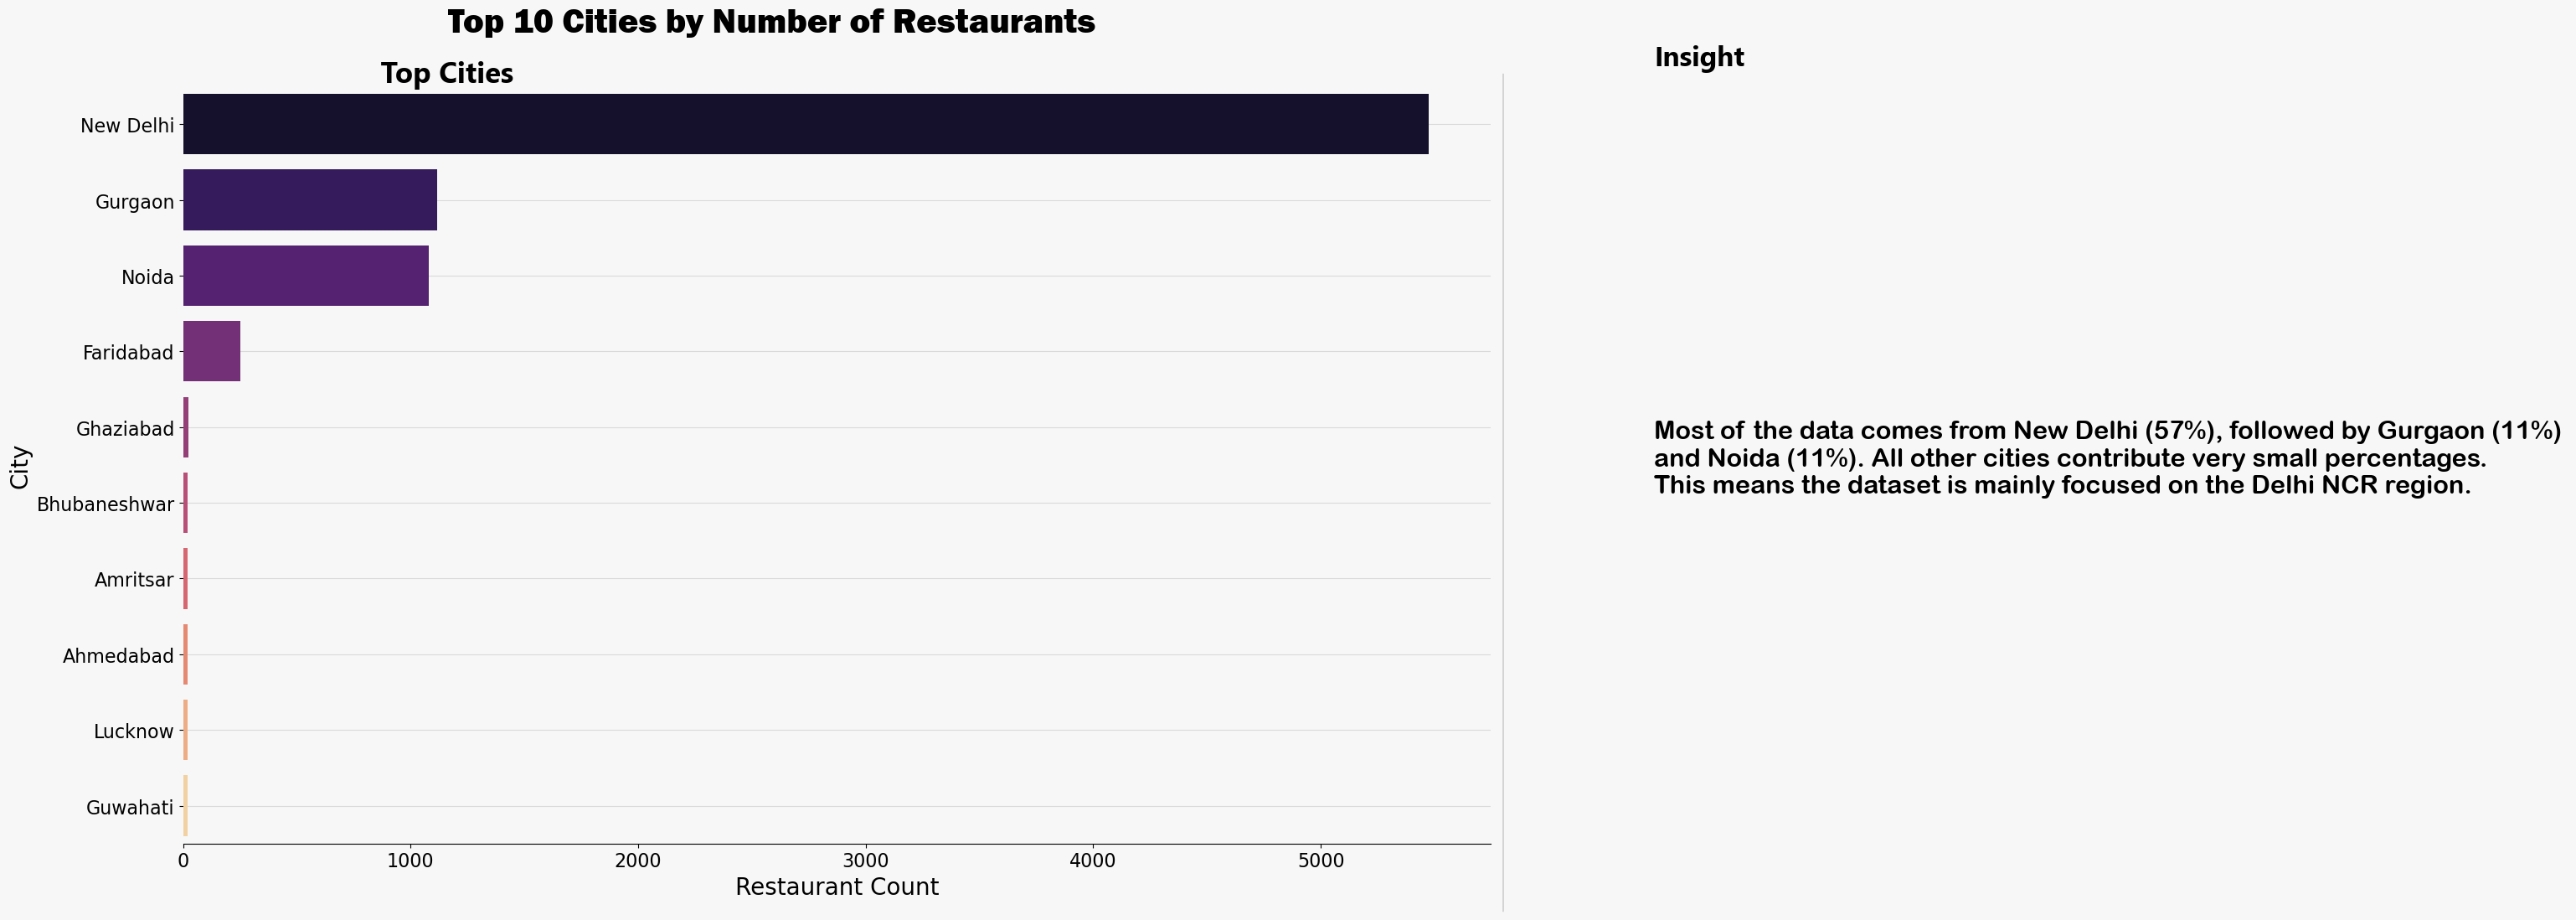

In [19]:
# Top 10 cities
top_cities = df['City'].value_counts().nlargest(10)
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plot count plot
sns.barplot(
    x=top_cities.values,
    y=top_cities.index,
    palette="magma"
)
plt.xlabel("Restaurant Count",fontsize=20)
plt.ylabel("City",fontsize=20)
# apply styling
apply_chart_styling(ax=ax,fig=fig,title="Top 10 Cities by Number of Restaurants",subtitle=' Top Cities ',insight_text='''Most of the data comes from New Delhi (57%), followed by Gurgaon (11%) 
and Noida (11%). All other cities contribute very small percentages.
This means the dataset is mainly focused on the Delhi NCR region.''')
plt.tight_layout()
plt.show()





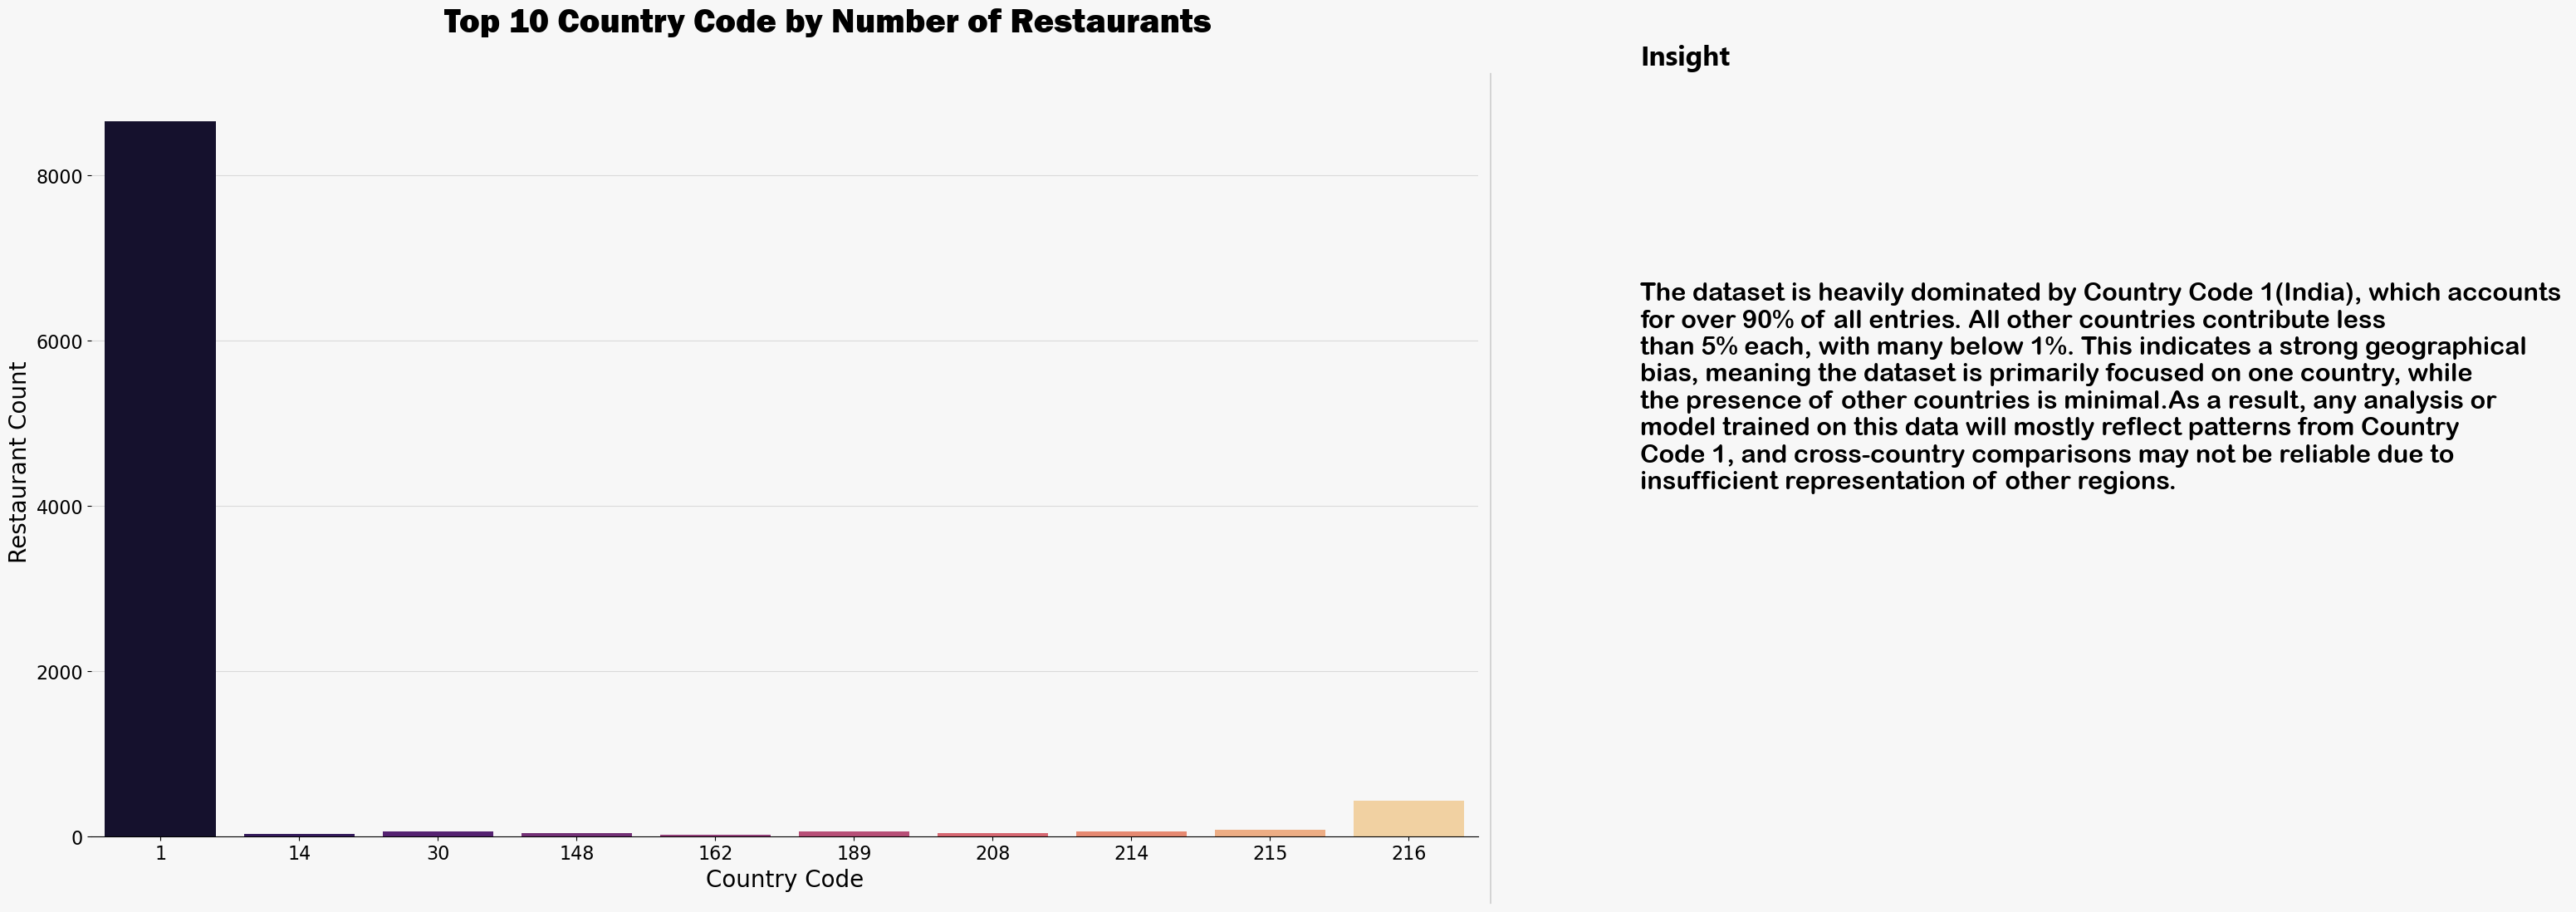

In [20]:
# Top 10 countries
top_c = df['Country Code'].value_counts().nlargest(10)
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plot count plot
sns.barplot(
    y=top_c.values,
    x=top_c.index,
    palette="magma"
)

plt.ylabel("Restaurant Count",fontsize=20)
plt.xlabel("Country Code",fontsize=20)
# apply chart styling
apply_chart_styling(ax=ax,fig=fig,title="Top 10 Country Code by Number of Restaurants",subtitle='',insight_text='''The dataset is heavily dominated by Country Code 1(India), which accounts 
for over 90% of all entries. All other countries contribute less
than 5% each, with many below 1%. This indicates a strong geographical  
bias, meaning the dataset is primarily focused on one country, while 
the presence of other countries is minimal.As a result, any analysis or
model trained on this data will mostly reflect patterns from Country 
Code 1, and cross-country comparisons may not be reliable due to
insufficient representation of other regions.''')
plt.tight_layout()
plt.show()



#### 3. Determine if there is any correlation between the restaurant's location and its rating.

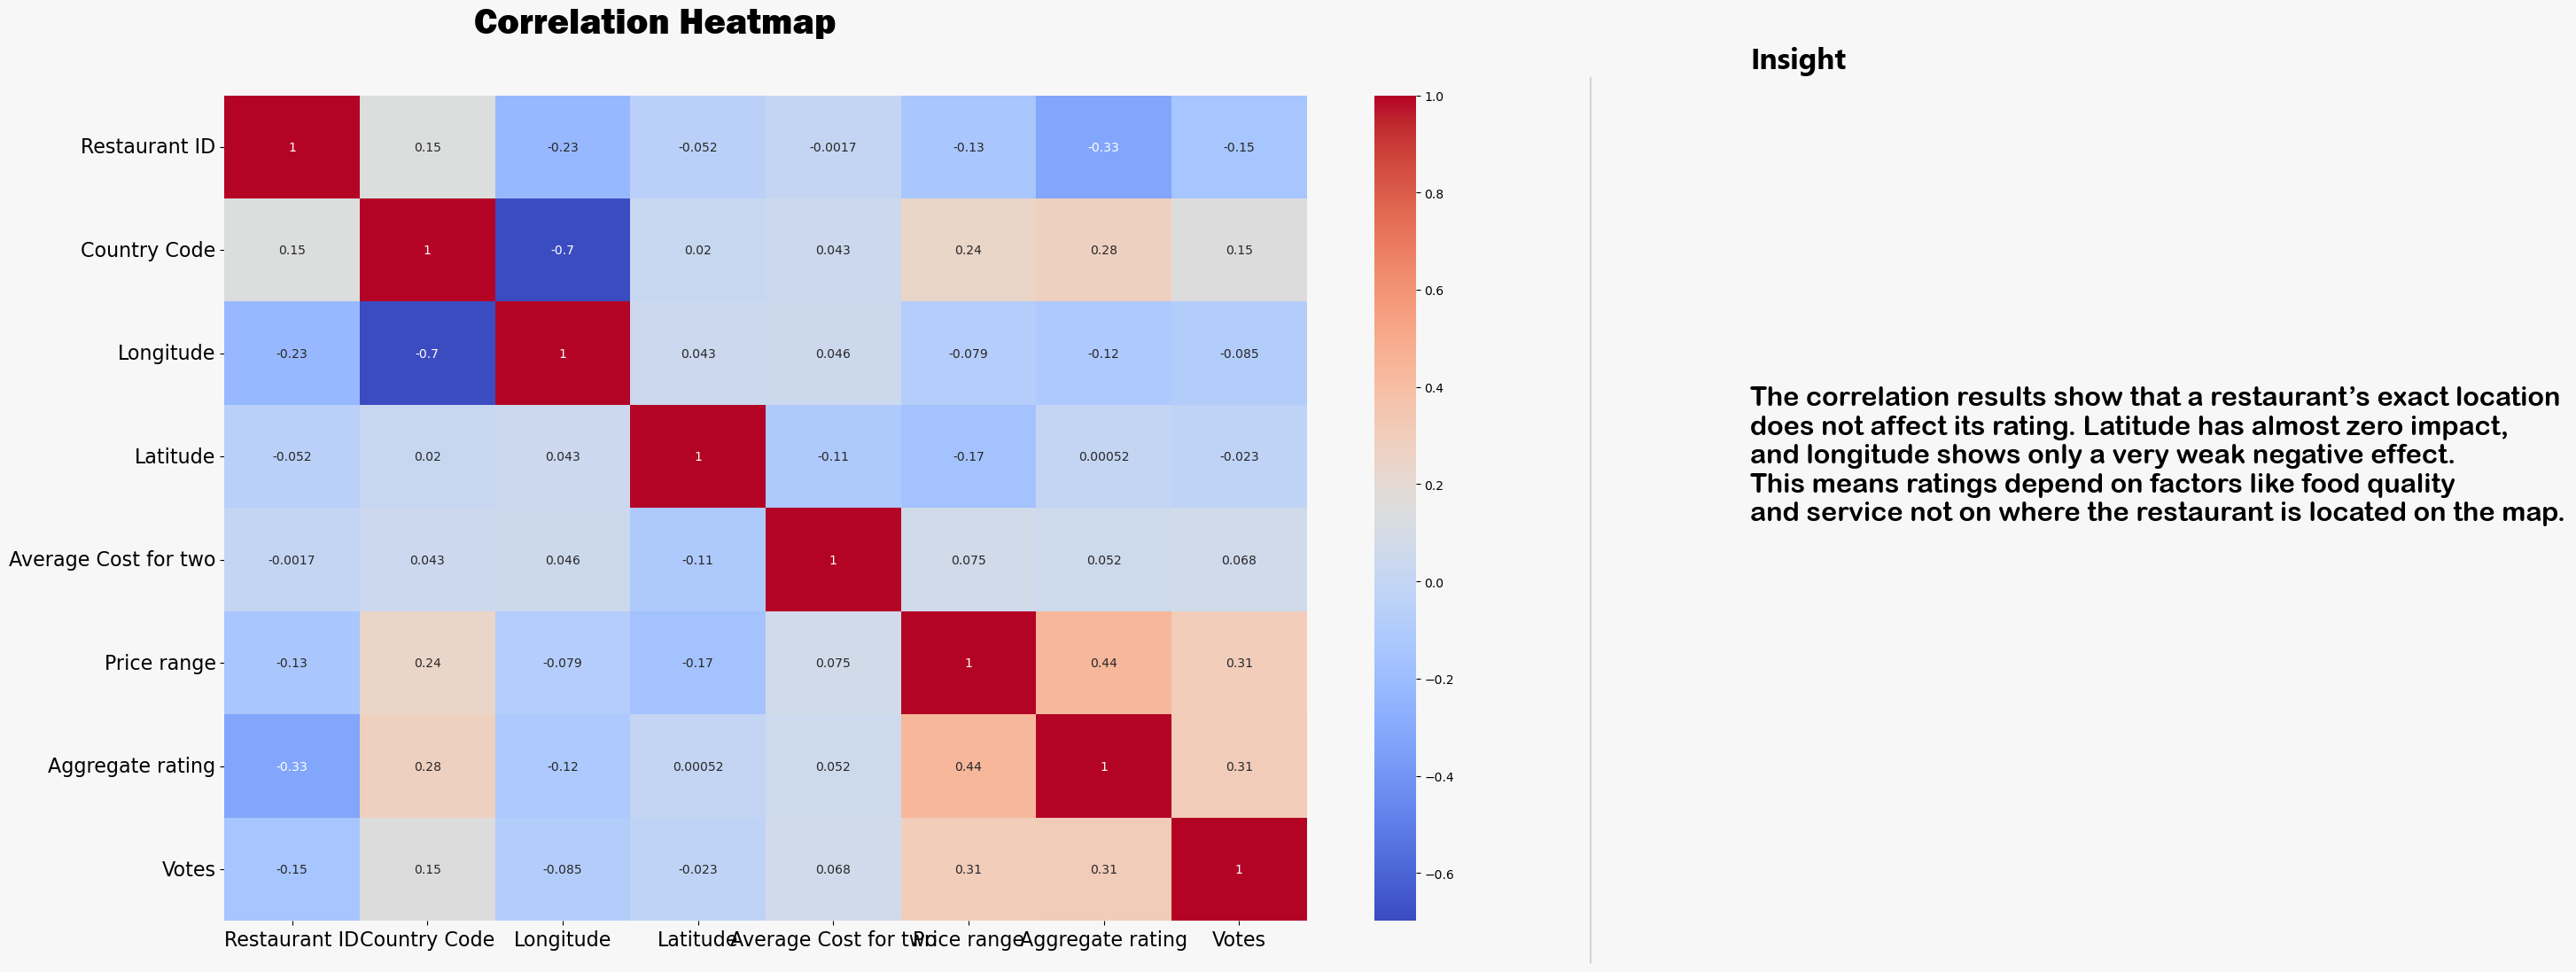

In [60]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
fig,ax=plt.subplots(1,1,figsize=(18,10))
# plot count plot
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
# apply chart styling
apply_chart_styling(ax=ax,fig=fig,title="Correlation Heatmap",subtitle='',insight_text='''The correlation results show that a restaurant’s exact location 
does not affect its rating. Latitude has almost zero impact, 
and longitude shows only a very weak negative effect.
This means ratings depend on factors like food quality
and service not on where the restaurant is located on the map.''')
plt.tight_layout()
plt.show()


In [50]:
corr_lat = df['Latitude'].corr(df['Aggregate rating'])
corr_lon = df['Longitude'].corr(df['Aggregate rating'])

print("Correlation with Latitude:", corr_lat)
print("Correlation with Longitude:", corr_lon)


Correlation with Latitude: 0.0005155806902360165
Correlation with Longitude: -0.11681757734540431
